In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sdv import SDV
from sdv import Metadata
from matplotlib import pyplot as plt

In [2]:
HOME_PATH = '' #home path of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/D_ContraceptiveMethod_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/SDV/D_ContraceptiveMethod_Synthetic_SDV.csv'

## 1. Read data

In [3]:
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_features = ['wife_education','husband_education','wife_religion','wife_working','husband_occupation',
                        'standard_of_living_index','media_exposure','contraceptive_method_used']
for c in categorical_features :
    real_data[c] = real_data[c].astype('category')
data_train = real_data
data_train

,wife_age,wife_education,husband_education,children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
0,36,2,4,11,1,1,1,4,1,3
1,48,1,3,4,1,1,3,3,1,1
2,38,1,2,8,1,1,3,3,1,1
3,27,2,2,5,1,1,3,1,0,3
4,26,3,2,4,1,1,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...
1173,34,2,4,6,1,0,3,4,0,1
1174,23,4,4,1,1,0,3,4,0,2
1175,29,3,4,3,1,1,3,2,0,3
1176,37,4,4,5,0,0,2,4,0,3


In [4]:
real_data.dtypes

wife_age                        int64
wife_education               category
husband_education            category
children                        int64
wife_religion                category
wife_working                 category
husband_occupation           category
standard_of_living_index     category
media_exposure               category
contraceptive_method_used    category
dtype: object

### 1.1. Create metada

In [5]:
metadata = Metadata()
metadata.add_table(name='data', data=real_data, primary_key='')
metadata

Metadata
  root_path: .
  tables: ['data']
  relationships:

In [6]:
tables = dict()
tables['data'] = real_data
tables

{'data':       wife_age wife_education husband_education  children wife_religion  \
 0           36              2                 4        11             1   
 1           48              1                 3         4             1   
 2           38              1                 2         8             1   
 3           27              2                 2         5             1   
 4           26              3                 2         4             1   
 ...        ...            ...               ...       ...           ...   
 1173        34              2                 4         6             1   
 1174        23              4                 4         1             1   
 1175        29              3                 4         3             1   
 1176        37              4                 4         5             0   
 1177        31              4                 4         2             1   
 
      wife_working husband_occupation standard_of_living_index media_exposure 

## 2. Train the model and generate data

In [7]:
sdv = SDV()
sdv.fit(metadata, tables)

In [8]:
samples = sdv.sample()
synthetic_data = samples['data']
synthetic_data

,wife_age,wife_education,husband_education,children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
0,31,4,1,3,1,1,1,3,0,3
1,44,2,4,7,1,1,3,3,0,1
2,27,4,4,1,1,0,3,4,0,1
3,35,3,4,4,1,1,2,3,0,3
4,26,3,2,3,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1173,34,3,4,3,1,1,2,4,0,3
1174,31,3,4,2,1,0,1,3,0,3
1175,34,1,1,4,1,1,3,3,0,1
1176,46,1,4,2,1,1,3,3,0,1


In [9]:
real_data.describe()

,wife_age,children
count,1178.000000,1178.000000
mean,32.829372,3.345501
std,8.332956,2.425505
min,16.000000,0.000000
25%,26.000000,2.000000
50%,32.000000,3.000000
75%,39.000000,5.000000
max,49.000000,16.000000


In [10]:
synthetic_data.describe()

,wife_age,children
count,1178.000000,1178.000000
mean,32.732598,3.331070
std,8.480613,2.476205
min,10.000000,-6.000000
25%,27.000000,2.000000
50%,33.000000,3.000000
75%,38.000000,5.000000
max,65.000000,11.000000


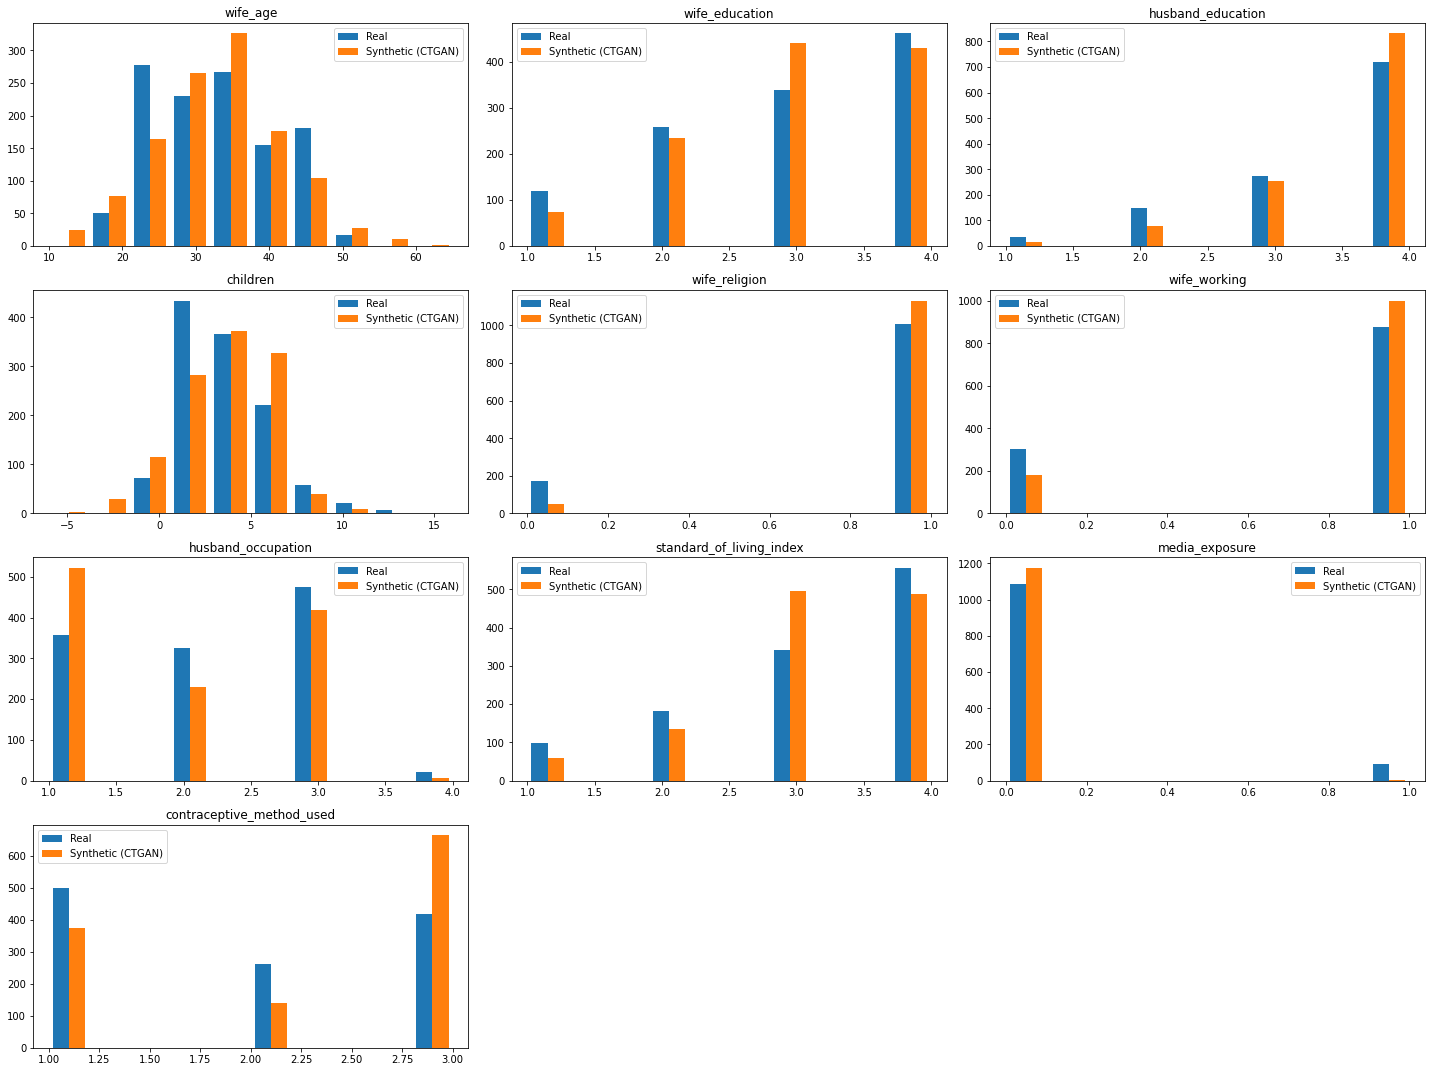

In [11]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (CTGAN)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[3,1])
fig.delaxes(axs[3,2])
fig.tight_layout(pad=1.1)

In [12]:
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index = False)